#### Lukman Hakim (2005013)
##### Template Matching

In [1]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

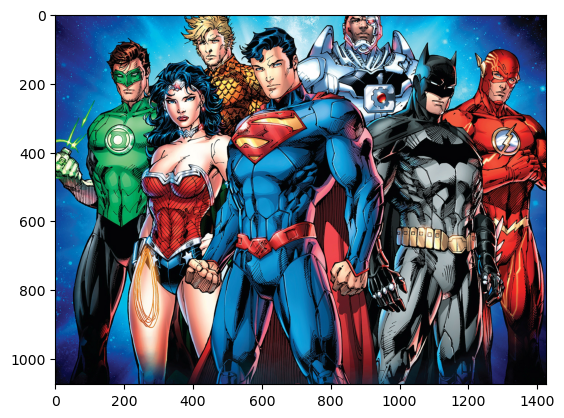

In [3]:
image = cv2.imread('Data/dc.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)

###### Template gambar

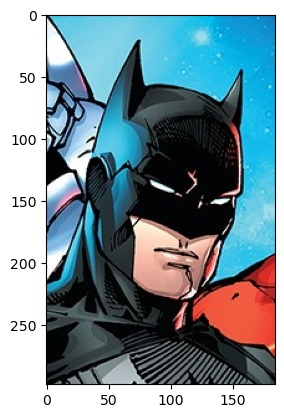

In [4]:
face= cv2.imread('Data/batman1.jpg') 
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB) 
plt.imshow(face)

In [5]:
height, width,channels = face.shape
print(f'height face : {height} dan width face : {width}')

height face : 298 dan width face : 184


###### Metode perbandingan list

In [6]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [7]:
def tampleteMatching(image, face, methods):
    resData=[]
    result =[]
    for i in  methods:
        full_copy = image.copy() 
        method = eval(i)
        res = cv2.matchTemplate(full_copy,face,method) 
        resData.append(res)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        # Set up drawing of Rectangle
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
                
        bottom_right = (top_left[0] + width, top_left[1] + height)
        
        # Draw the  Red  Rectangle
        cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)
        result.append(full_copy)
        
        # Plot the Images
        plt.subplot(121) 
        plt.imshow(res)
        plt.title('Result of Template Matching')
        
        plt.subplot(122)
        plt.imshow(full_copy)
        plt.title('Detected Point')
        plt.suptitle(i)
        
        plt.show()
        print('\n')
        
    return [resData, result]

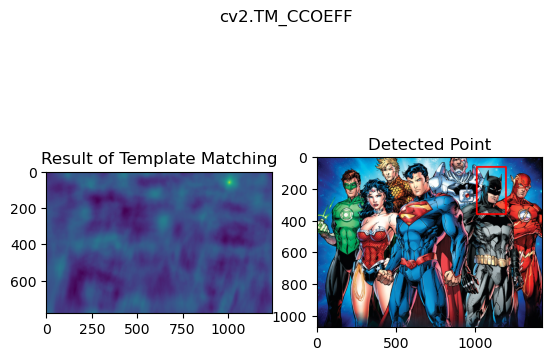

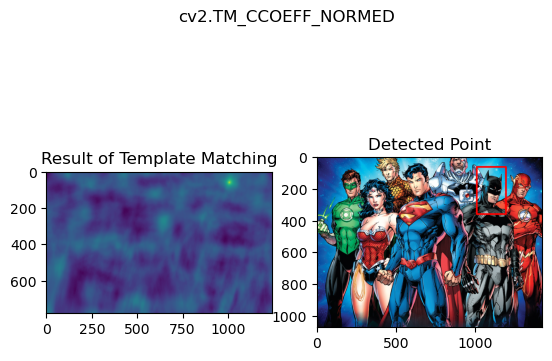

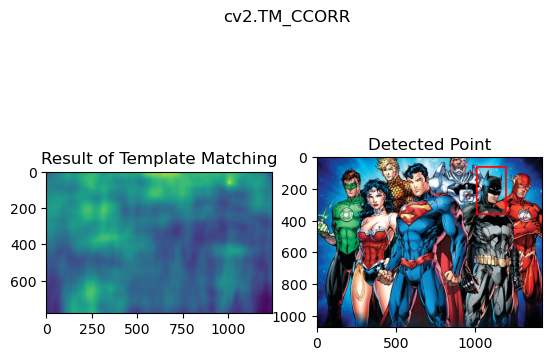

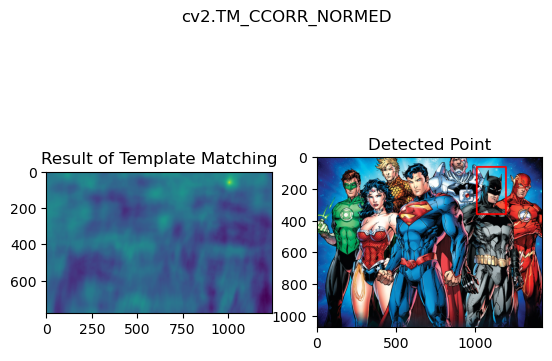

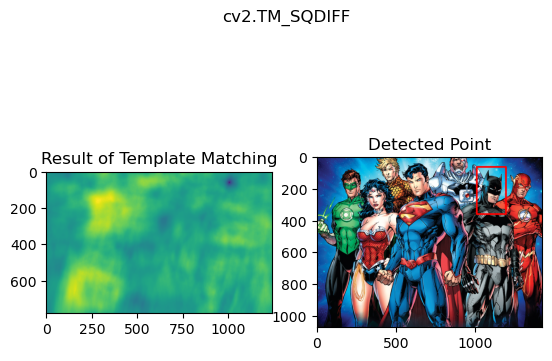

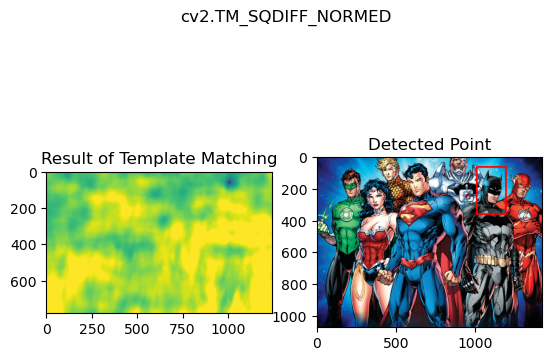



jenis data : <class 'list'>, ukuran data : 6
[array([[-1.26205896e+08, -1.26993712e+08, -1.27133712e+08, ...,
        -1.43698000e+08, -1.43835248e+08, -1.44139568e+08],
       [-1.25980224e+08, -1.26519528e+08, -1.26449520e+08, ...,
        -1.42864096e+08, -1.42901216e+08, -1.42947968e+08],
       [-1.25167280e+08, -1.25592912e+08, -1.25605480e+08, ...,
        -1.41425520e+08, -1.41720896e+08, -1.41794816e+08],
       ...,
       [ 1.56129680e+08,  1.59279120e+08,  1.63833536e+08, ...,
         3.95070200e+07,  4.21529840e+07,  4.47913480e+07],
       [ 1.58215424e+08,  1.60955936e+08,  1.65314080e+08, ...,
         4.00109680e+07,  4.24820440e+07,  4.50995080e+07],
       [ 1.59882720e+08,  1.62397744e+08,  1.66757824e+08, ...,
         4.05977480e+07,  4.26641880e+07,  4.51549280e+07]], dtype=float32), array([[-0.25108966, -0.25052497, -0.2486414 , ..., -0.15513183,
        -0.15550575, -0.1560693 ],
       [-0.2501996 , -0.24915387, -0.2468759 , ..., -0.15408844,
        -0.154

In [8]:
resData, result = tampleteMatching(image, face, methods) 
print(f'jenis data : {type(resData)}, ukuran data : {len(resData)}') 
print(resData)

###### Menggunakan data template yang berbeda

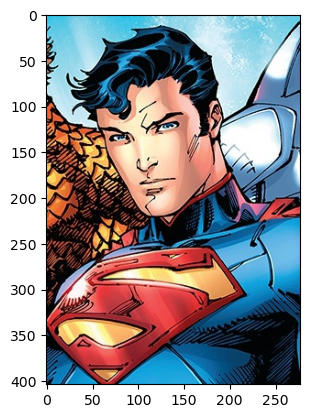

In [9]:
face2= cv2.imread('Data/superman1.jpg')
face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)
plt.imshow(face2)

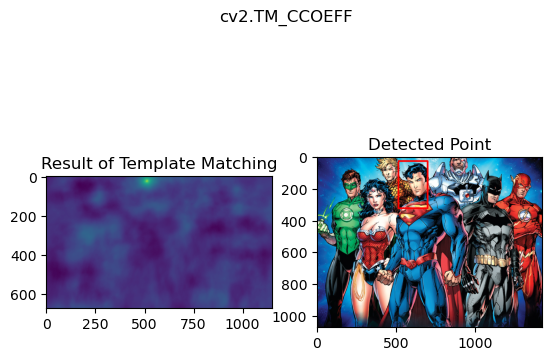

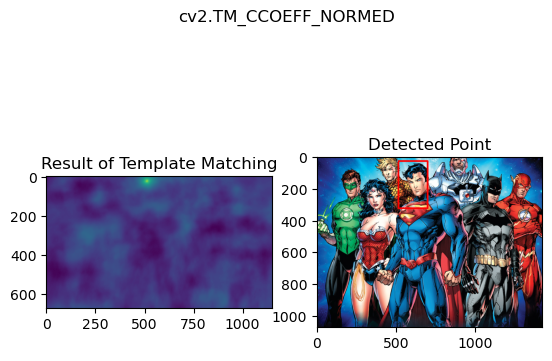

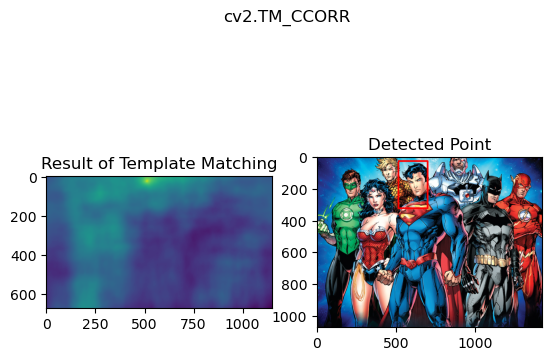

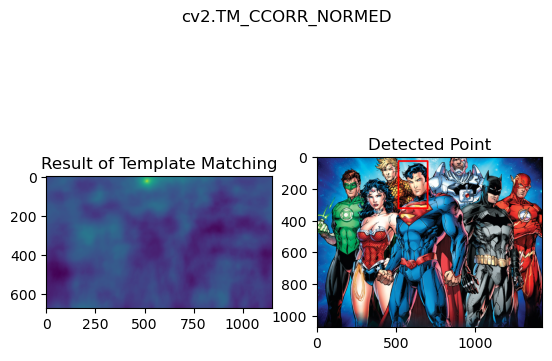

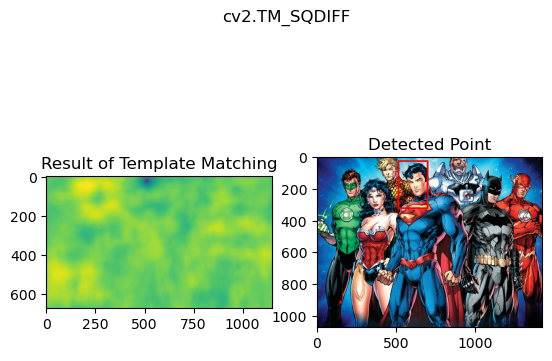

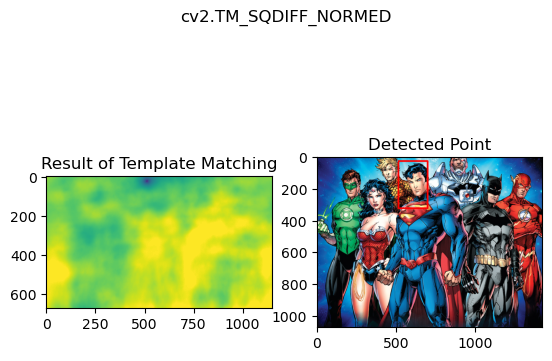



jenis data : <class 'list'>, ukuran data : 6
[array([[-2.8052694e+08, -2.7683789e+08, -2.7228013e+08, ...,
        -1.5178629e+07, -1.4034941e+07, -1.4145443e+07],
       [-2.7898691e+08, -2.7433158e+08, -2.6914982e+08, ...,
        -1.1225259e+07, -1.1394043e+07, -1.2888196e+07],
       [-2.7625795e+08, -2.7094566e+08, -2.6626646e+08, ...,
        -7.7755130e+06, -9.4395200e+06, -1.1893191e+07],
       ...,
       [ 8.6496040e+07,  8.5482672e+07,  8.6263096e+07, ...,
         1.3543933e+08,  1.4010032e+08,  1.4150726e+08],
       [ 8.9727672e+07,  8.9164808e+07,  9.0208400e+07, ...,
         1.3356259e+08,  1.3847088e+08,  1.3985144e+08],
       [ 9.2945720e+07,  9.3261256e+07,  9.4209248e+07, ...,
         1.3207170e+08,  1.3676477e+08,  1.3856565e+08]], dtype=float32), array([[-0.15474299, -0.15241063, -0.14957832, ..., -0.0065528 ,
        -0.00606602, -0.00612068],
       [-0.15378276, -0.15092127, -0.14775075, ..., -0.00484214,
        -0.00492059, -0.0055721 ],
       [-0.1521

In [10]:
resData, result = tampleteMatching(image, face2, methods) 
print(f'jenis data : {type(resData)}, ukuran data : {len(resData)}') 
print(resData)

##### Brute Force Detection

###### Persiapan sample data

In [11]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

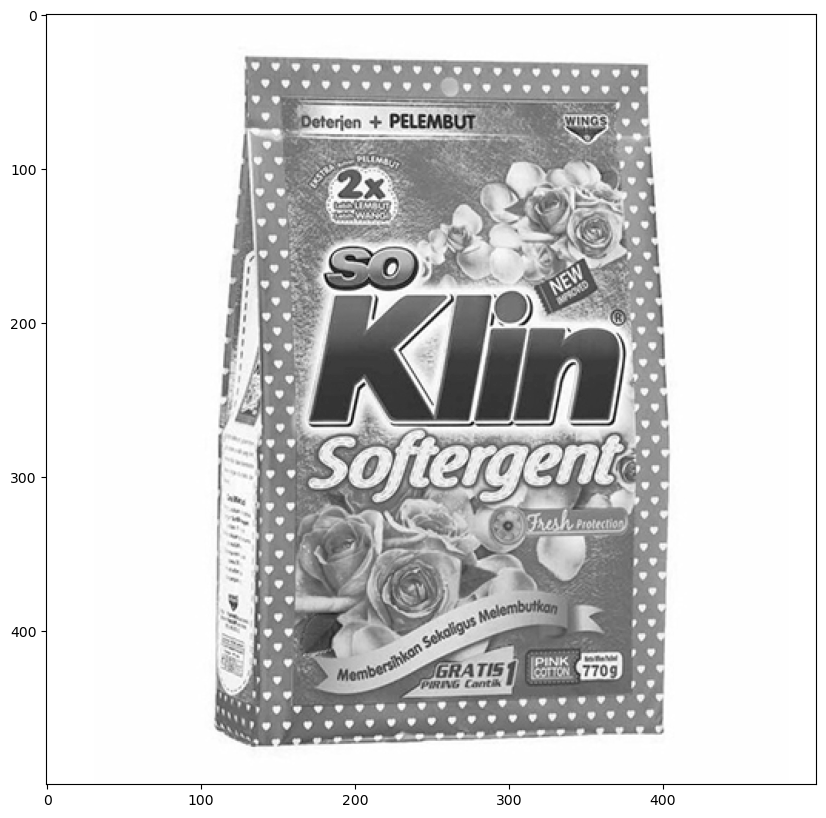

In [12]:
# data  object
obj = cv2.imread('Data/soklin.jpg',0)
display(obj)

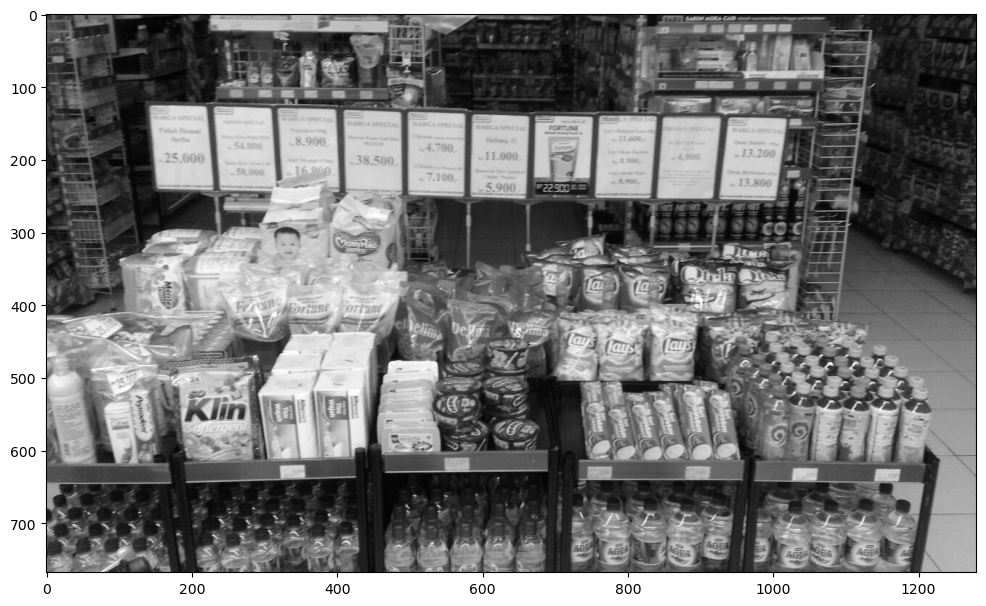

In [13]:
# data  host
host = cv2.imread('Data/alfamart.jpg',0)
display(host)

##### Menggunakan ORB Descriptors

keypoint object : <class 'tuple'>, 500, deskripsi object : (500, 32)
keypoint host : <class 'tuple'>, 500, deskripsi host : (500, 32)


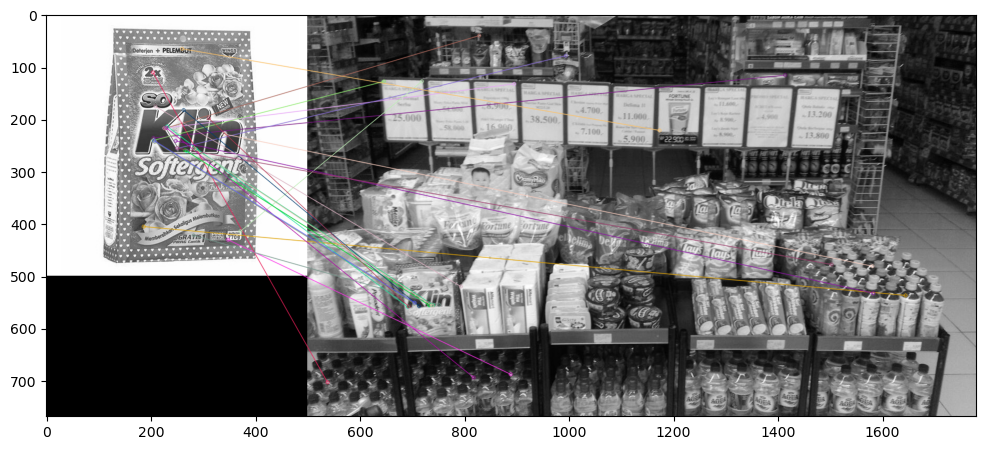

In [14]:
# Initiate  ORB  detector
orb = cv2.ORB_create()

#  find  the  keypoints  and  descriptors
kp1, des1 = orb.detectAndCompute(obj,None)
kp2, des2 = orb.detectAndCompute(host,None)
print(f'keypoint object : {type(kp1)}, {len(kp1)}, deskripsi object : {des1.shape}')
print(f'keypoint host : {type(kp2)}, {len(kp2)}, deskripsi host : {des2.shape}')

# create BFMatcher  object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match  descriptors.
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)

# Draw
obj_matches = cv2.drawMatches(obj,kp1,host,kp2,matches[:25],None,flags=2)

display(obj_matches)

###### Menggunakan SIFT Descriptors dan Ratio Test

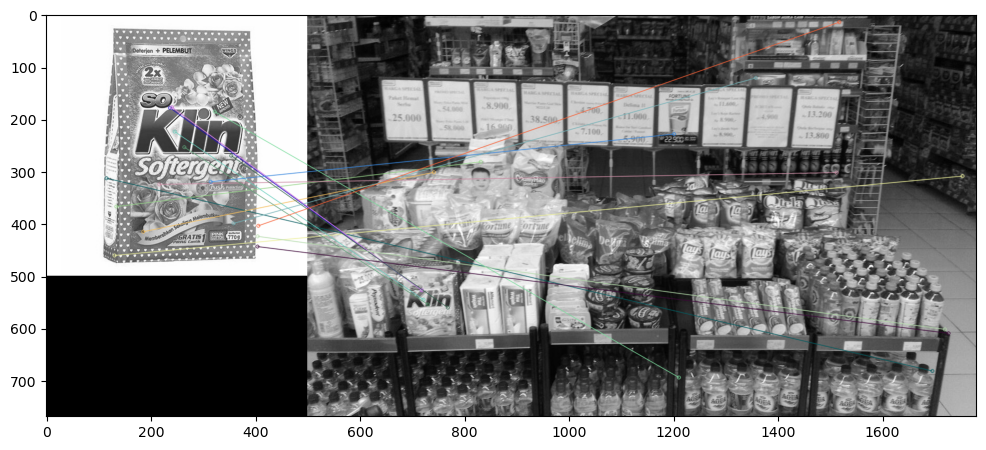

In [15]:
# Create  SIFT  Object
sift = cv2.xfeatures2d.SIFT_create()

#  find  the  keypoints  and  descriptors
kp1, des1 = sift.detectAndCompute(obj,None) 
kp2, des2 = sift.detectAndCompute(host,None)

# BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply  ratio  test
good = []
for  match1,match2 in  matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

#   cv2.drawMatchesKnn
sift_matches = cv2.drawMatchesKnn(obj,kp1,host,kp2,good,None,flags=2)

display(sift_matches)